In [1]:
!apt -y install libharfbuzz-dev libfribidi-dev libtiff5-dev libgsl-dev libglpk-dev
!pip install cdt ges rpy2==3.5.1
!pip install pingouin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libamd2 libblkid-dev libbtf1 libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcxsparse3 libffi-dev libglib2.0-dev libglib2.0-dev-bin libglpk40 libgmp-dev libgmpxx4ldbl
  libgraphblas-dev libgraphblas6 libgraphite2-dev libgsl27 libgslcblas0 libharfbuzz-gobject0
  libharfbuzz-icu0 libklu1 libldl2 libmetis5 libmongoose2 libmount-dev librbio2 libselinux1-dev
  libsepol-dev libsliplu1 libspqr2 libsuitesparse-dev libsuitesparseconfig5 libumfpack5
Suggested packages:
  libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev libxml2-utils
  libiodbc2-dev gmp-doc libgmp10-doc libmpfr-dev libgraphite2-utils gsl-ref-psdoc | gsl-doc-pdf
  | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libamd2 libblkid-dev libbtf1 libcamd2 libccolamd2 libcholmod3 libcola

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
update.packages(ask=FALSE)
install.packages("BiocManager")
BiocManager::install(c("graph", "RBGL"))
install.packages(c("pcalg", "kpcalg", "devtools"))
devtools::install_github("Diviyan-Kalainathan/RCIT")
cdt.SETTINGS.rpath = '/usr/bin/Rscript'



















































































































































































	‘/tmp/RtmpwRIQ8N/downloaded_packages’

















	‘/tmp/RtmpwRIQ8N/downloaded_packages’


(as ‘lib’ is unspecified)







	‘/tmp/RtmpwRIQ8N/downloaded_packages’

'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com































	‘/tmp/RtmpwRIQ8N/downloaded_packages’

(as ‘lib’ is unspecified)


















































































































	‘/tmp/RtmpwRIQ8N/downloaded_packages’



(as ‘lib’ is unspecified)







	‘/tmp/RtmpwRIQ8N/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpwRIQ8N/remotesa124215d74/Diviyan-Kalainathan-RCIT-c97f91c/DESCRIPTION’ ... OK
* preparing ‘RCIT’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘RCIT_0.1.0.tar.gz’



(as ‘lib’ is unspecified)



## Load data

In [4]:
# import necessary packages
from itertools import combinations

import cdt
# cdt.SETTINGS.rpath = '/usr/local/bin/Rscript' # for macOS
# cdt.SETTINGS.rpath = 'C:/Program Files/R/R-4.0.3/bin/Rscript' # for Windows

#from dowhy import CausalModel
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from numpy.random import normal
import pandas as pd
import pingouin as pg

np.random.seed(0)

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [13]:
import json

In [15]:
def causal_discovery(df, name,alpha=0.05, backgorund_knowledge=None):
  if backgorund_knowledge:
    pc = cdt.causality.graph.PC(CItest="gaussian", alpha=alpha)
    ### Define background knowledge ###
    prior_graph = nx.DiGraph() # Create a graph to hold our background knowledge
    prior_graph.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5']) # Add nodes
    prior_graph.add_edges_from([('x2', 'x5'), ('x5', 'x2')]) # Add prior knowledge of edge between X_2 and X_5 existing
    fixed_edges = pd.DataFrame(nx.adjacency_matrix(prior_graph).todense()) # Symmetric adjacency matrix representing edges that exist
    fixed_gaps = pd.DataFrame(np.zeros((5,5), dtype=int)) # Symmetric adjacency matrix representing edges that canNOT exist
    ### Run PC ###
    pc.arguments['{CITEST}'] = pc.dir_CI_test[pc.CI_test]
    pc.arguments['{METHOD_INDEP}'] = pc.dir_method_indep[pc.CI_test]
    pc.arguments['{DIRECTED}'] = 'TRUE'
    pc.arguments['{ALPHA}'] = str(pc.alpha)
    pc.arguments['{NJOBS}'] = str(pc.njobs)
    result = pc._run_pc(df, fixedEdges=fixed_edges, fixedGaps=fixed_gaps)
    pc_graph = nx.relabel_nodes(nx.DiGraph(result), {idx: i for idx, i in enumerate(df.columns)})
    ### Visalise ###
    colors = ['red'  if (y,x) in pc_graph.edges() else 'black' for (x,y) in pc_graph.edges()]
    nx.draw(pc_graph, with_labels=True, node_size=500, node_color='w', edgecolors ='black', pos=pos, edge_color=colors)
  else:
    pc = cdt.causality.graph.PC(CItest="gaussian", alpha=0.05)
    pc_graph = pc.create_graph_from_data(df)
    pos = nx.spring_layout(pc_graph, k=100)
    colors = ['red'  if (y,x) in pc_graph.edges() else 'black' for (x,y) in pc_graph.edges()]
    nx.draw(pc_graph, with_labels=True, node_size=3500, node_color='w', edgecolors ='black', pos=pos, edge_color=colors)
    data = nx.node_link_data(pc_graph)
    with open(name + ".json", "w") as f:
      json.dump(data, f)


    return pc_graph

## Load Data

In [7]:
TREATMENT_PATH = "./data/ab_test"
OBSERVATIONAL_PATH = "./data/observational_data"
LALONDE_COLUMNS = ["treatment",  "age", "education", "black" , "hispanic", "married", "nodegree", "re74" , "re78"]
NSWRE_COLUMNS = ["treatment",  "age", "education", "black" , "hispanic", "married", "nodegree", "re74", "re75", "re78"]
INTEGER_COLS =  ["treatment", "age", "education", "black", "hispanic", "married", "nodegree"]

In [8]:
lalonde_control = pd.read_csv("lalonde_control.txt", sep='\s+',index_col=None, header=None, names=LALONDE_COLUMNS)
lalonde_treated = pd.read_csv("lalonde_treated.txt", sep='\s+',index_col=None, header=None, names=LALONDE_COLUMNS)
lalonde_original = pd.concat([lalonde_control, lalonde_treated], axis=0)
assert(lalonde_original.shape[0] == 722)

In [9]:
nswre_control = pd.read_csv("nswre74_control.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
nswre_treated = pd.read_csv("nswre74_treated.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
nswre_df = pd.concat([nswre_control, nswre_treated], axis=0)
nswre_df["origin"] = "NSWRE"
assert(nswre_df.shape[0] == 445)

In [10]:
cps_control = pd.read_csv("cps_controls.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
cps2_control = pd.read_csv("cps2_controls.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
cps3_control = pd.read_csv("cps3_controls.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)

cps_control["origin"] = "CPS"
assert(cps_control.shape[0] == 15992)
psid_control = pd.read_csv("psid_controls.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
psid2_control = pd.read_csv("psid2_controls.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
psid3_control = pd.read_csv("psid3_controls.txt", sep='\s+',index_col=None, header=None, names=NSWRE_COLUMNS)
psid_control["origin"] = "PSID"
assert(psid_control.shape[0] == 2490)

In [11]:
final_df = pd.concat([nswre_treated, cps_control], axis=0)
final_df[INTEGER_COLS] = final_df[INTEGER_COLS].astype("int64")
final_df.shape

(16177, 11)

## We build different combinations

In [25]:
# Experiment NSWRE
nswre = nswre_df[NSWRE_COLUMNS].copy()
nswre[INTEGER_COLS] = nswre[INTEGER_COLS].astype("int64")

# Experiment NSWRE + PSID
nswre_psid = pd.concat([nswre_treated, psid_control], axis=0)[NSWRE_COLUMNS]
nswre_psid[INTEGER_COLS] = nswre_psid[INTEGER_COLS].astype("int64")


# Experiment NSWRE + PSID2
nswre_psid_2 = pd.concat([nswre_treated, psid_control], axis=0)[NSWRE_COLUMNS]
nswre_psid_2[INTEGER_COLS] = nswre_psid_2[INTEGER_COLS].astype("int64")

# Experiment NSWRE + PSID3
nswre_psid_3 = pd.concat([nswre_treated, psid_control], axis=0)[NSWRE_COLUMNS]
nswre_psid_3[INTEGER_COLS] = nswre_psid_3[INTEGER_COLS].astype("int64")

# Experiment NSWRE + CPS
nswre_cps = pd.concat([nswre_treated, cps_control], axis=0)[NSWRE_COLUMNS]
nswre_cps[INTEGER_COLS] = nswre_cps[INTEGER_COLS].astype("int64")

# Experiment NSWRE + CPS2
nswre_cps2 = pd.concat([nswre_treated, cps_control], axis=0)[NSWRE_COLUMNS]
nswre_cps2[INTEGER_COLS] = nswre_cps2[INTEGER_COLS].astype("int64")

# Experiment NSWRE + CPS3
nswre_cps3 = pd.concat([nswre_treated, cps_control], axis=0)[NSWRE_COLUMNS]
nswre_cps3[INTEGER_COLS] = nswre_cps3[INTEGER_COLS].astype("int64")

# All together

nswre_cps_psid = pd.concat([nswre_treated, nswre_control ,cps_control, psid_control], axis=0)[NSWRE_COLUMNS]
nswre_cps_psid[INTEGER_COLS] = nswre_cps_psid[INTEGER_COLS].astype("int64")



## Notebook start

# Causal Discovery

## Lalonde Experiment

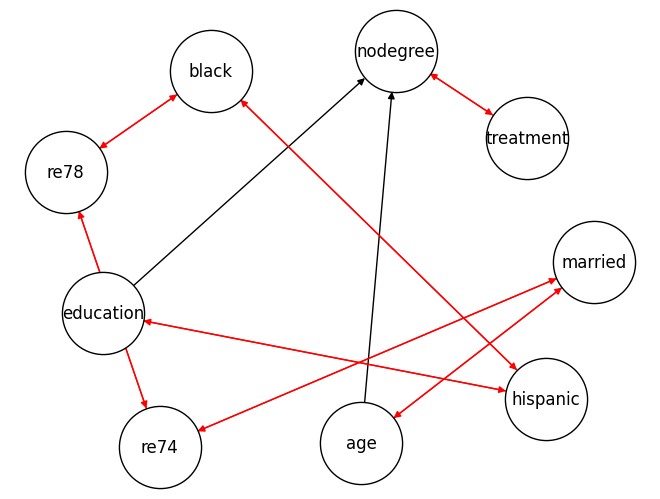

In [16]:
causal_discovery(lalonde_original, "lalonde_original", alpha=0.05, backgorund_knowledge=None)

## NSWRE experimental data only

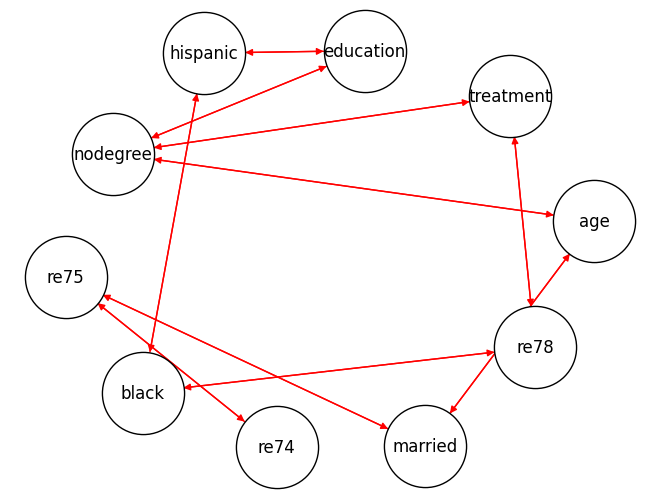

In [17]:
# Experiment NSWE
causal_discovery(nswre, "nswre", alpha=0.05, backgorund_knowledge=None)

# PSIDs

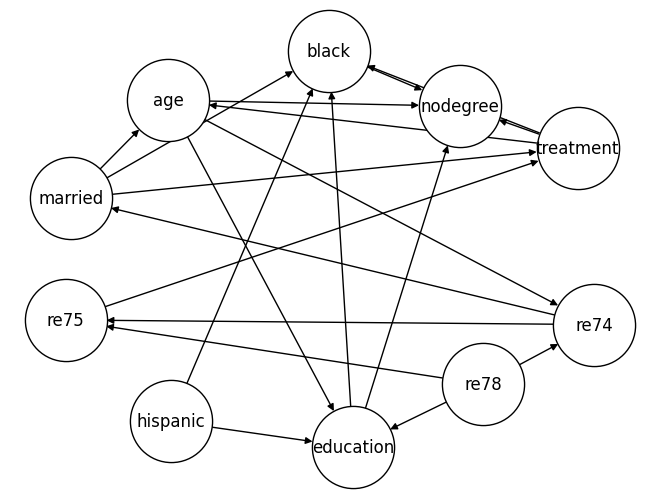

In [18]:
causal_discovery(nswre_psid, "nswre_psid",alpha=0.05, backgorund_knowledge=None)

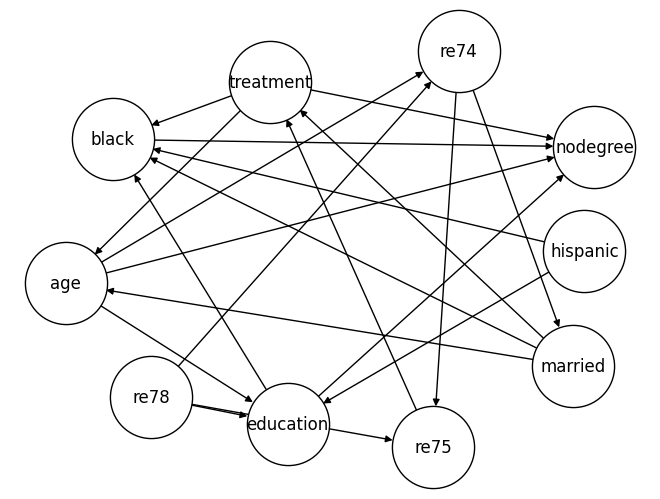

In [19]:
causal_discovery(nswre_psid_2, "nswre_psid_2", alpha=0.05, backgorund_knowledge=None)

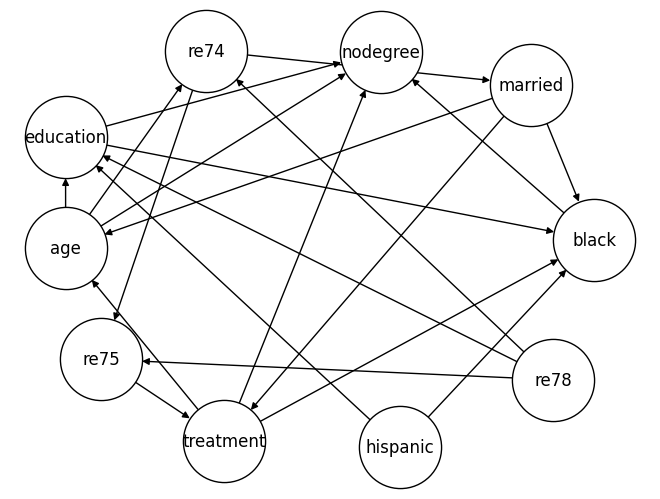

In [20]:
causal_discovery(nswre_psid_3, "nswre_psid_3", alpha=0.05, backgorund_knowledge=None)

# CPS

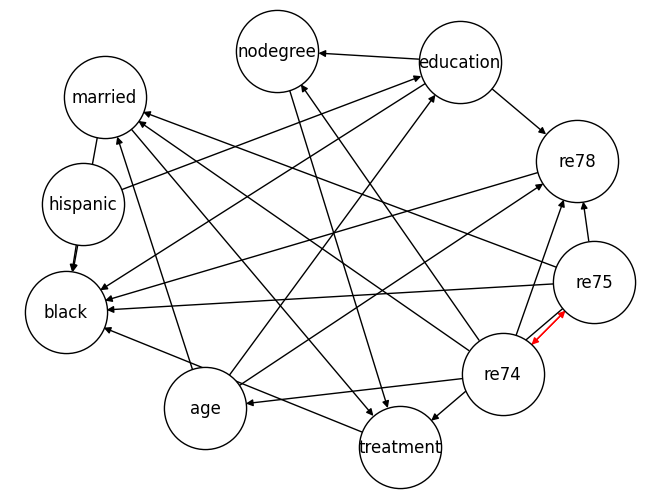

In [21]:
causal_discovery(nswre_cps, "nswre_cps", alpha=0.05, backgorund_knowledge=None)

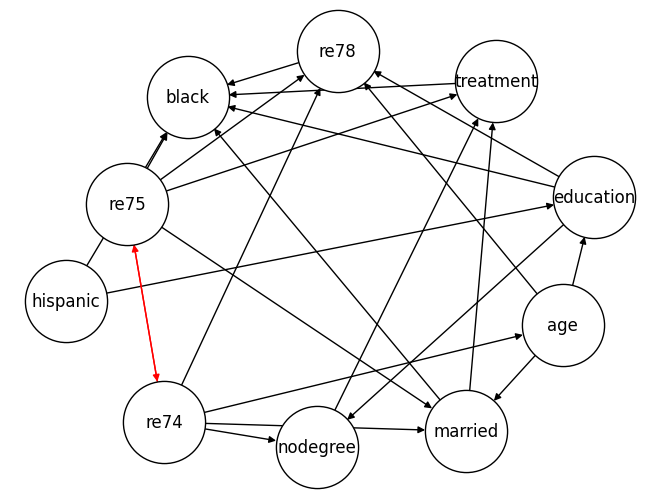

In [22]:
causal_discovery(nswre_cps2, "nswre_cps2", alpha=0.05, backgorund_knowledge=None)

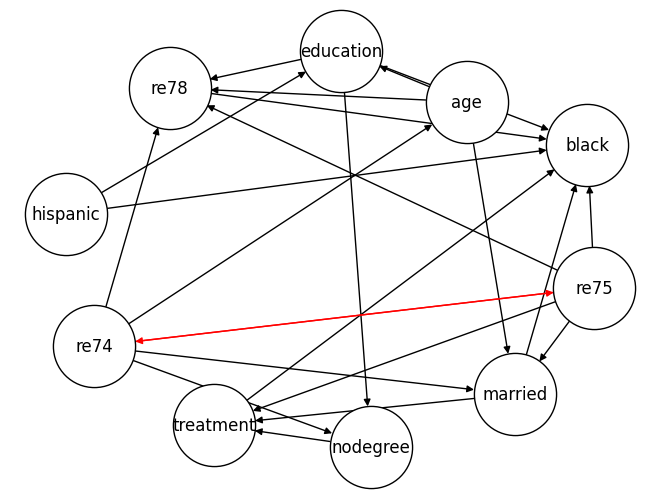

In [24]:
causal_discovery(nswre_cps3, "nswre_cps3", alpha=0.05, backgorund_knowledge=None)

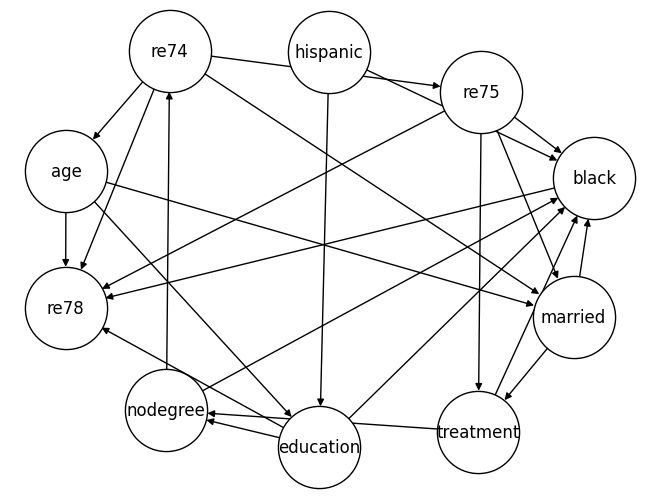

In [26]:
causal_discovery(nswre_cps_psid, "nswre_cps_psid", alpha=0.05, backgorund_knowledge=None)